# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create empty lists to store data
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
clouds = []
wind_speed = []
country = []
date = []

# Create record and set counter at 1
record_counter = 1
set_counter = 1

In [5]:
# Base URL for query
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [7]:
print("Beginning Data Retrieval")
print("---------------------------------")

# For each city name in the citiy list, try...
for city in cities:
    # Try statement
    try:
        query_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"
        response = requests.get(query_url)
        weather_json = response.json()
        city_name.append(weather_json["name"])
        clouds.append(weather_json["clouds"]["all"])
        country.append(weather_json["sys"]["country"])
        date.append(weather_json["dt"])
        humidity.append(weather_json["main"]["humidity"])
        lat.append(weather_json["coord"]["lat"])
        lng.append(weather_json["coord"]["lon"])
        max_temp.append(weather_json['main']['temp_max'])
        wind_speed.append(weather_json["wind"]["speed"])
     
        print(f"Processing Record {record_counter} of set {set_counter} | {city}")
    
    except KeyError:
        print(f"City not found. Skipping {city}...")
    
    record_counter = record_counter + 1
    if record_counter == 51:
        record_counter = 1
        set_counter = set_counter + 1
        
print("---------------------------------")
print("Data Retrieval Complete")
print("---------------------------------")

Beginning Data Retrieval
---------------------------------
Processing Record 1 of set 1 | sur
Processing Record 2 of set 1 | mahebourg
Processing Record 3 of set 1 | naze
Processing Record 4 of set 1 | mataura
Processing Record 5 of set 1 | east london
Processing Record 6 of set 1 | butaritari
Processing Record 7 of set 1 | west memphis
Processing Record 8 of set 1 | vaini
Processing Record 9 of set 1 | la ronge
Processing Record 10 of set 1 | kokopo
City not found. Skipping illoqqortoormiut...
City not found. Skipping barentsburg...
Processing Record 13 of set 1 | yellowknife
Processing Record 14 of set 1 | paamiut
Processing Record 15 of set 1 | tasiilaq
City not found. Skipping kamenskoye...
Processing Record 17 of set 1 | zabol
Processing Record 18 of set 1 | bambous virieux
Processing Record 19 of set 1 | hilo
City not found. Skipping mys shmidta...
Processing Record 21 of set 1 | virginia beach
Processing Record 22 of set 1 | cabo san lucas
Processing Record 23 of set 1 | acarau


Processing Record 48 of set 4 | tolmin
Processing Record 49 of set 4 | cascais
Processing Record 50 of set 4 | arinos
City not found. Skipping putla...
Processing Record 2 of set 5 | klaksvik
Processing Record 3 of set 5 | daru
Processing Record 4 of set 5 | padang
Processing Record 5 of set 5 | vao
Processing Record 6 of set 5 | vila
Processing Record 7 of set 5 | macenta
Processing Record 8 of set 5 | jizan
Processing Record 9 of set 5 | bowen
Processing Record 10 of set 5 | hobart
Processing Record 11 of set 5 | novyy urgal
Processing Record 12 of set 5 | sandovo
Processing Record 13 of set 5 | coahuayana
Processing Record 14 of set 5 | dingle
Processing Record 15 of set 5 | oranjemund
Processing Record 16 of set 5 | palmer
Processing Record 17 of set 5 | atar
Processing Record 18 of set 5 | bama
Processing Record 19 of set 5 | sitka
Processing Record 20 of set 5 | cherskiy
Processing Record 21 of set 5 | bengkulu
City not found. Skipping viligili...
Processing Record 23 of set 5 | 

Processing Record 2 of set 9 | price
Processing Record 3 of set 9 | warwick
Processing Record 4 of set 9 | kavaratti
Processing Record 5 of set 9 | yar-sale
Processing Record 6 of set 9 | phulji
Processing Record 7 of set 9 | nemuro
City not found. Skipping falealupo...
Processing Record 9 of set 9 | nome
Processing Record 10 of set 9 | roanoke rapids
Processing Record 11 of set 9 | kamenka
City not found. Skipping temaraia...
City not found. Skipping chikoy...
Processing Record 14 of set 9 | tadine
Processing Record 15 of set 9 | lethbridge
Processing Record 16 of set 9 | kindu
Processing Record 17 of set 9 | ambilobe
Processing Record 18 of set 9 | cocorit
Processing Record 19 of set 9 | shahr-e babak
Processing Record 20 of set 9 | morondava
Processing Record 21 of set 9 | sao filipe
Processing Record 22 of set 9 | staronizhestebliyevskaya
Processing Record 23 of set 9 | tower
Processing Record 24 of set 9 | touros
Processing Record 25 of set 9 | loandjili
City not found. Skipping l

Processing Record 49 of set 12 | shizunai
Processing Record 50 of set 12 | comodoro rivadavia
City not found. Skipping bolshiye uki...
Processing Record 2 of set 13 | tornio
Processing Record 3 of set 13 | ugoofaaru
Processing Record 4 of set 13 | bloemfontein
Processing Record 5 of set 13 | gaoua
Processing Record 6 of set 13 | lufilufi
City not found. Skipping dzhusaly...
Processing Record 8 of set 13 | roebourne
Processing Record 9 of set 13 | manoel urbano
Processing Record 10 of set 13 | benguela
Processing Record 11 of set 13 | srandakan
Processing Record 12 of set 13 | aqtobe
Processing Record 13 of set 13 | itaituba
Processing Record 14 of set 13 | nandyal
Processing Record 15 of set 13 | kerema
Processing Record 16 of set 13 | sola
Processing Record 17 of set 13 | danielskuil
Processing Record 18 of set 13 | aden
Processing Record 19 of set 13 | krasnoselkup
Processing Record 20 of set 13 | shadrinsk
City not found. Skipping barawe...
Processing Record 22 of set 13 | gangawati

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [18]:
weather_dictionary = {
    "City": city_name,
    "Latitude": lat,
    "Longitude": lng,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed":wind_speed,
    "Country": country,
    "Date": date
}
                        
weather_df = pd.DataFrame(weather_dictionary)
weather_df.drop_duplicates("City")


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sur,22.5667,59.5289,81.79,79,37,17.22,OM,1658862769
2,Mahébourg,-20.4081,57.7000,69.26,82,3,12.50,MU,1658862783
3,Naze,28.3667,129.4833,79.50,77,2,5.75,JP,1658862783
4,Mataura,-46.1927,168.8643,44.47,97,100,7.65,NZ,1658862784
5,East London,-33.0153,27.9116,64.06,58,5,10.54,ZA,1658862784
...,...,...,...,...,...,...,...,...,...
573,Kieta,-6.2167,155.6333,77.97,83,100,0.94,PG,1658863009
574,Rongcheng,30.6340,117.8517,77.07,97,65,2.53,CN,1658863010
575,Ystad,55.4297,13.8204,59.74,60,43,19.26,SE,1658863010
576,Jutaí,-5.1833,-68.9000,89.64,54,19,1.39,BR,1658863010


In [19]:
weather_df.count()

City          578
Latitude      578
Longitude     578
Max Temp      578
Humidity      578
Cloudiness    578
Wind Speed    578
Country       578
Date          578
dtype: int64

In [20]:
# Export city data into a .csv
weather_df.to_csv("../output_data/cities.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [23]:
# Dropping all city data with humidity over 100%
cleaned_weather = weather_df.loc[weather_df["Humidity"] <= 100]
len(cleaned_weather["Humidity"]) # None were deleted from the original data

578

In [33]:
cleaned_weather.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sur,22.5667,59.5289,81.79,79,37,17.22,OM,1658862769
1,Sur,22.5667,59.5289,81.79,79,37,17.22,OM,1658862782
2,Mahébourg,-20.4081,57.7000,69.26,82,3,12.50,MU,1658862783
3,Naze,28.3667,129.4833,79.50,77,2,5.75,JP,1658862783
4,Mataura,-46.1927,168.8643,44.47,97,100,7.65,NZ,1658862784


In [24]:
#  Get the indices of cities that have humidity over 100%.
cleaned_weather.index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            568, 569, 570, 571, 572, 573, 574, 575, 576, 577],
           dtype='int64', length=578)

In [35]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_df
clean_city_data.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sur,22.5667,59.5289,81.79,79,37,17.22,OM,1658862769
1,Sur,22.5667,59.5289,81.79,79,37,17.22,OM,1658862782
2,Mahébourg,-20.4081,57.7000,69.26,82,3,12.50,MU,1658862783
3,Naze,28.3667,129.4833,79.50,77,2,5.75,JP,1658862783
4,Mataura,-46.1927,168.8643,44.47,97,100,7.65,NZ,1658862784


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

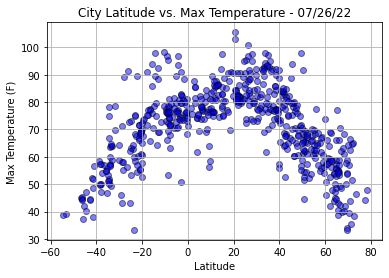

<Figure size 432x288 with 0 Axes>

In [37]:
# Create a scatterplot for Latitude vs. Max Temp
plt.scatter(clean_city_data["Latitude"], clean_city_data["Max Temp"], marker = "o", color = "blue", edgecolors = "black", alpha = 0.5)

# Formatting scatterplot
plt.title("City Latitude vs. Max Temperature - 07/26/22")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)
plt.show()

# Save as png
plt.savefig("../output_data/lat_vs_max_temp.png")

## Latitude vs. Humidity Plot

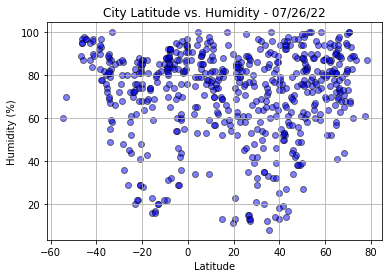

<Figure size 432x288 with 0 Axes>

In [38]:
# Create a scatterplot for Latitude vs. Humidity
plt.scatter(clean_city_data["Latitude"], clean_city_data["Humidity"], marker = "o", color = "blue", edgecolors = "black", alpha = 0.5)

# Formatting scatterplot
plt.title("City Latitude vs. Humidity - 07/26/22")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

# Save as png
plt.savefig("../output_data/lat_vs_humidity.png")

## Latitude vs. Cloudiness Plot

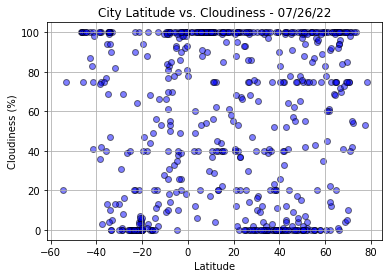

<Figure size 432x288 with 0 Axes>

In [39]:
# Create a scatterplot for Latitude vs. Cloudiness
plt.scatter(clean_city_data["Latitude"], clean_city_data["Cloudiness"], marker = "o", color = "blue", edgecolors = "black", alpha = 0.5)

# Formatting scatterplot
plt.title("City Latitude vs. Cloudiness - 07/26/22")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)
plt.show()

# Save as png
plt.savefig("../output_data/lat_vs_cloudiness.png")

## Latitude vs. Wind Speed Plot

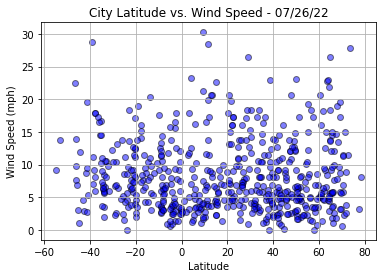

<Figure size 432x288 with 0 Axes>

In [40]:
# Create a scatterplot for Latitude vs. Wind Speed
plt.scatter(clean_city_data["Latitude"], clean_city_data["Wind Speed"], marker = "o", color = "blue", edgecolors = "black", alpha = 0.5)

# Formatting scatterplot
plt.title("City Latitude vs. Wind Speed - 07/26/22")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)
plt.show()

# Save as png
plt.savefig("../output_data/lat_vs_wind_speed.png")

## Linear Regression

In [41]:
# Create North and South Hemisphere DF's
northern_df = clean_city_data.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Latitude"]).astype(float) < 0, :]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.6875848218960733


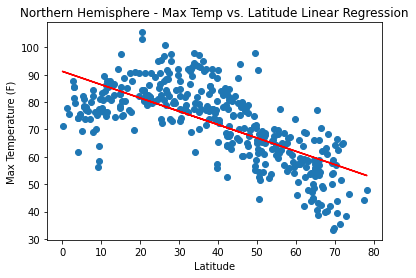

Regression line equation is: y = -0.49x + 91.2


In [52]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is a negative correlation between latitude and max temperatures. The further the location is to the equator, the colder the temperature is.")
plt.show()

# Since the equation did not show up on the graph
print(f"Regression line equation is: {line_eq}")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7359756256887916


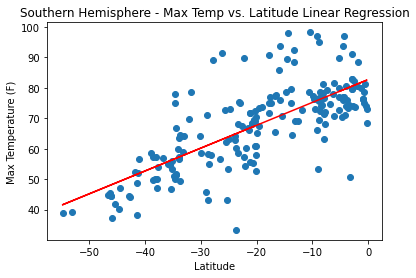

Regression line equation is: y = 0.75x + 82.69


In [53]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Max Temp"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is a positive correlation between latitude and max temperatures. The closer the location is to the equator, the hotter the temperature is.")
plt.show()

# Since the equation did not show up on the graph
print(f"Regression line equation is: {line_eq}")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.10260304397628119


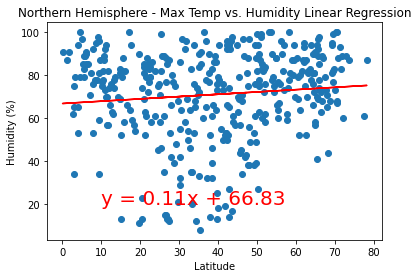

In [55]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is no correlation between latitude and humidity.")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.15579326284888828


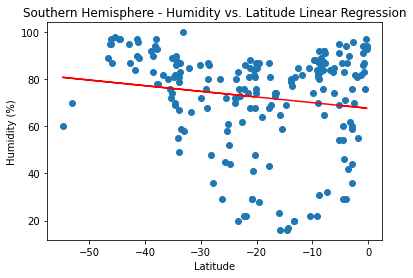

Regression line equation is: y = -0.24x + 67.68


In [57]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Humidity"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is no correlation between latitude and humidity.")
plt.show()

# Since the equation did not show up on the graph
print(f"Regression line equation is: {line_eq}")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.0032937088239239254


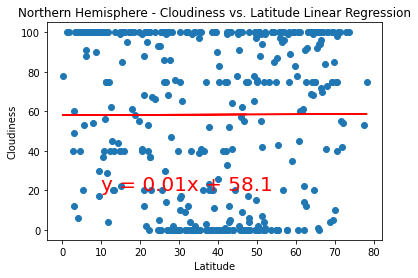

In [58]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is no correlation between latitude and cloudiness.")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03547866502949737


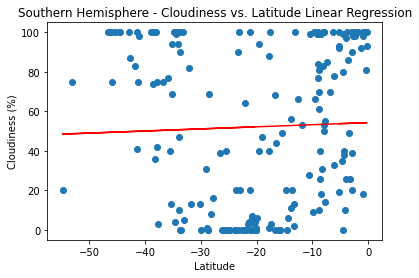

Regression line equation is: y = 0.11x + 54.28


In [59]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Cloudiness"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is no correlation between latitude and cloudiness.")
plt.show()

# Since the equation did not show up on the graph
print(f"Regression line equation is: {line_eq}")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.0015081185721630577


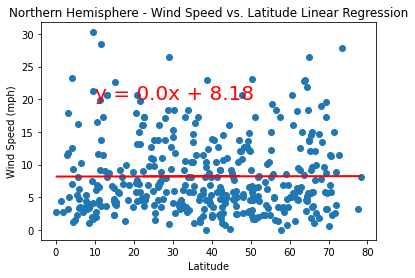

In [60]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(northern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(northern_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is no correlation between latitude and wind speed.")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21957056744607237


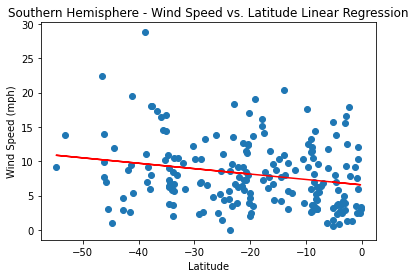

Regression line equation is: y = -0.08x + 6.56


In [62]:
# Changing x and y values to floats and getting linear equation
x_values = pd.to_numeric(southern_df["Latitude"]).astype(float)
y_values = pd.to_numeric(southern_df["Wind Speed"]).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Formatting scatterplot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize = 20,color = "red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude Linear Regression")
print(f"The r-value is: {rvalue}")
print(f"The data shows there is no correlation between latitude and wind speed.")
plt.show()

# Since the equation did not show up on the graph
print(f"Regression line equation is: {line_eq}")